## Cristian Taylor
## 8/3/2024
## DSC320 Math for Data Science 
## Week 9 - __Probabilities and Data__


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

qb_stats = pd.read_csv('qb_stats.csv')
qb_stats.describe()
numerical_columns = ["games","att","cmp","comp_pct","yds","ypa","td","int","sack","loss","rating"]
qb_stats_numerical = qb_stats[numerical_columns]


# Display the first few rows of the dataframe to understand its structure
print(qb_stats.head())

             name team  games    att    cmp  comp_pct     yds  ypa    td  int  \
0  Ryan Tannehill  TEN   12.0  286.0  201.0      70.3  2742.0  9.6  22.0  6.0   
1      Drew Brees   NO   11.0  378.0  281.0      74.3  2979.0  7.9  27.0  4.0   
2   Lamar Jackson  BAL   15.0  401.0  265.0      66.1  3127.0  7.8  36.0  6.0   
3    Kirk Cousins  MIN   15.0  444.0  307.0      69.1  3603.0  8.1  26.0  6.0   
4  Russell Wilson  SEA   16.0  516.0  341.0      66.1  4110.0  8.0  31.0  5.0   

   sack   loss  rating  
0  31.0  212.0   117.5  
1  12.0   89.0   116.3  
2  23.0  106.0   113.3  
3  28.0  206.0   107.4  
4  48.0  319.0   106.3  


### Step 1+2: Calculate the mean and standard deviations of each numerical column.

In [9]:
means = qb_stats_numerical.mean()

# Step 2: Calculate the standard deviation of each numerical column
std_devs = qb_stats_numerical.std()

# Display the means and standard deviations
print("Means:")
print(means)
print("\nStandard Deviations:")
print(std_devs)


Means:
games         14.125000
att          478.406250
cmp          306.562500
comp_pct      64.296875
yds         3515.062500
ypa            7.375000
td            22.375000
int           10.343750
sack          32.312500
loss         217.093750
rating        93.387500
dtype: float64

Standard Deviations:
games         2.406309
att         110.360366
cmp          68.929575
comp_pct      3.627537
yds         852.437489
ypa           0.796768
td            6.256609
int           5.839849
sack         10.514008
loss         70.786075
rating       11.054725
dtype: float64


### Step 3: Create a histogram of the number of yards

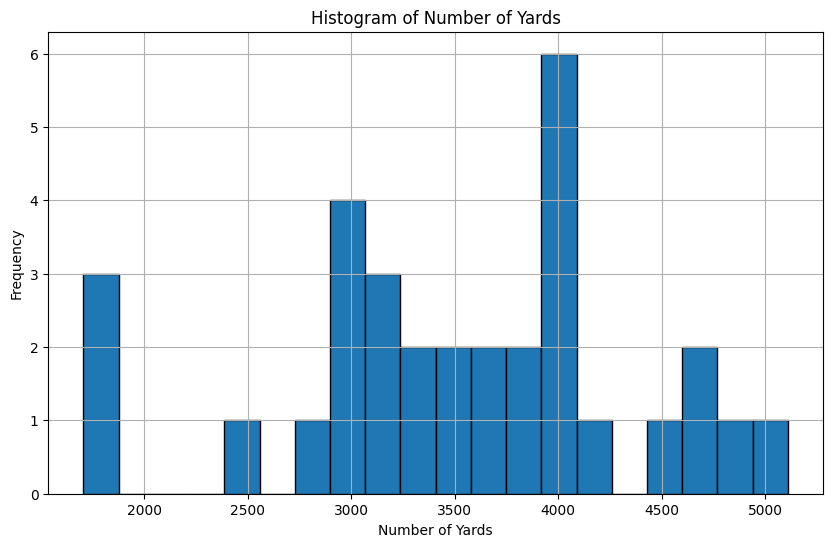

In [10]:
# Step 3: Create a histogram of the number of yards
plt.figure(figsize=(10, 6))
plt.hist(qb_stats['yds'], bins=20, edgecolor='black')
plt.title('Histogram of Number of Yards')
plt.xlabel('Number of Yards')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Step 4: Create a boxplot of the number of touchdowns and identify any outliers

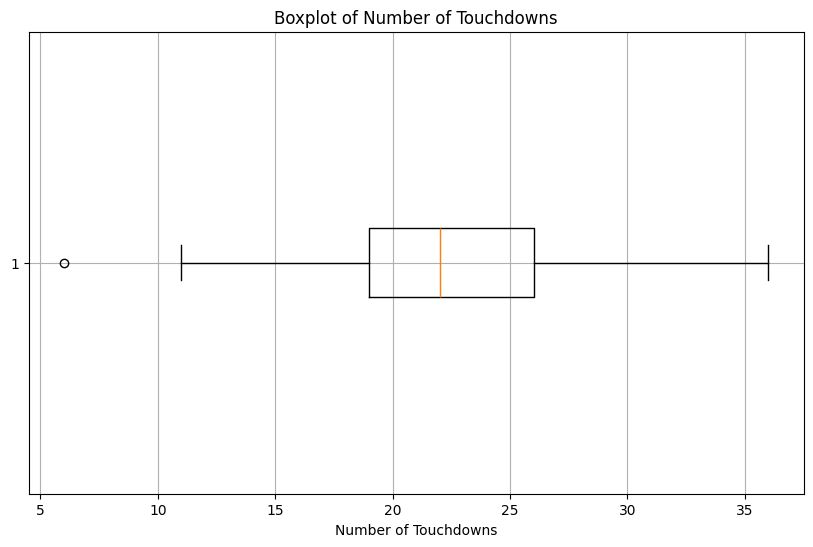

Outliers in Touchdowns:
          name   td
24  Joe Flacco  6.0


In [11]:

plt.figure(figsize=(10, 6))
plt.boxplot(qb_stats['td'], vert=False)
plt.title('Boxplot of Number of Touchdowns')
plt.xlabel('Number of Touchdowns')
plt.grid(True)
plt.show()


Q1 = qb_stats['td'].quantile(0.25)
Q3 = qb_stats['td'].quantile(0.75)
IQR = Q3 - Q1
outliers = qb_stats[(qb_stats['td'] < (Q1 - 1.5 * IQR)) | (qb_stats['td'] > (Q3 + 1.5 * IQR))]
print("Outliers in Touchdowns:")
print(outliers[['name', 'td']])

## Problem 2 - Calculating Probabilities from Data



In [12]:
# Load the data
survey_data = pd.read_csv('survey_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(survey_data.head())


  hair_color eye_color
0      brown     brown
1      brown     brown
2      brown      blue
3      brown     green
4      brown     brown


## Probablities found in Survey Data

In [13]:
# Calculate the total number of students
total_students = len(survey_data)

# 1. Probability of having brown hair
brown_hair_students = survey_data[survey_data['hair_color'] == 'brown']
p_brown_hair = len(brown_hair_students) / total_students

# 2. Probability of having blue eyes
blue_eyes_students = survey_data[survey_data['eye_color'] == 'blue']
p_blue_eyes = len(blue_eyes_students) / total_students

# 3. Probability of having blue eyes given that they have brown hair
p_blue_eyes_given_brown_hair = len(brown_hair_students[brown_hair_students['eye_color'] == 'blue']) / len(brown_hair_students)

# 4. Probability of having brown hair given that they have blue eyes
p_brown_hair_given_blue_eyes = len(blue_eyes_students[blue_eyes_students['hair_color'] == 'brown']) / len(blue_eyes_students)

# Display probabilities
print(f"Probability of having brown hair: {p_brown_hair:.4f}")
print(f"Probability of having blue eyes: {p_blue_eyes:.4f}")
print(f"Probability of having blue eyes given brown hair: {p_blue_eyes_given_brown_hair:.4f}")
print(f"Probability of having brown hair given blue eyes: {p_brown_hair_given_blue_eyes:.4f}")

Probability of having brown hair: 0.5123
Probability of having blue eyes: 0.2469
Probability of having blue eyes given brown hair: 0.2169
Probability of having brown hair given blue eyes: 0.4500


### Check if having brown hair and blue eyes are independent

In [14]:
# Two events A and B are independent if P(A and B) = P(A) * P(B)
p_brown_hair_and_blue_eyes = len(survey_data[(survey_data['hair_color'] == 'Brown') & (survey_data['hair_color'] == 'Blue')]) / total_students
independence_check = (p_brown_hair * p_blue_eyes) == p_brown_hair_and_blue_eyes
print(f"Are having brown hair and blue eyes independent events? {independence_check}")

Are having brown hair and blue eyes independent events? False


 
### Create a bar graph of the hair color and eye color of this group of students

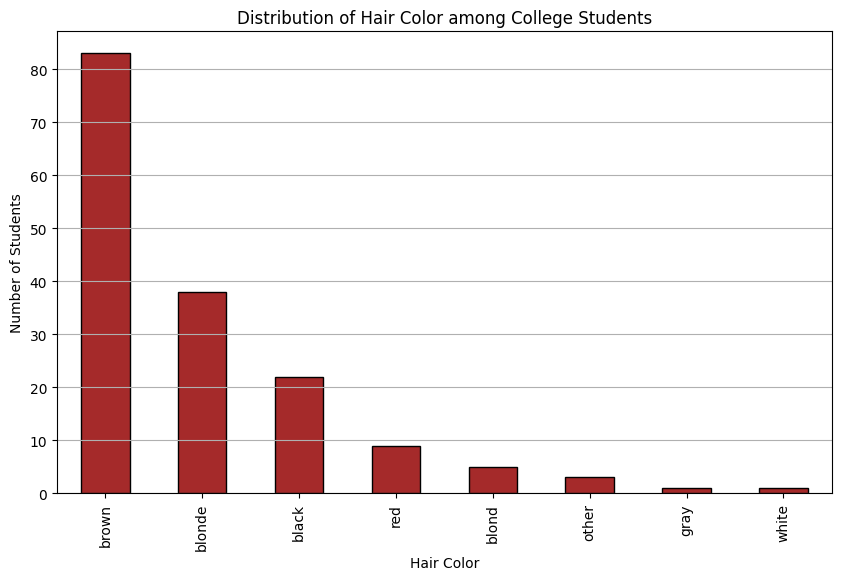

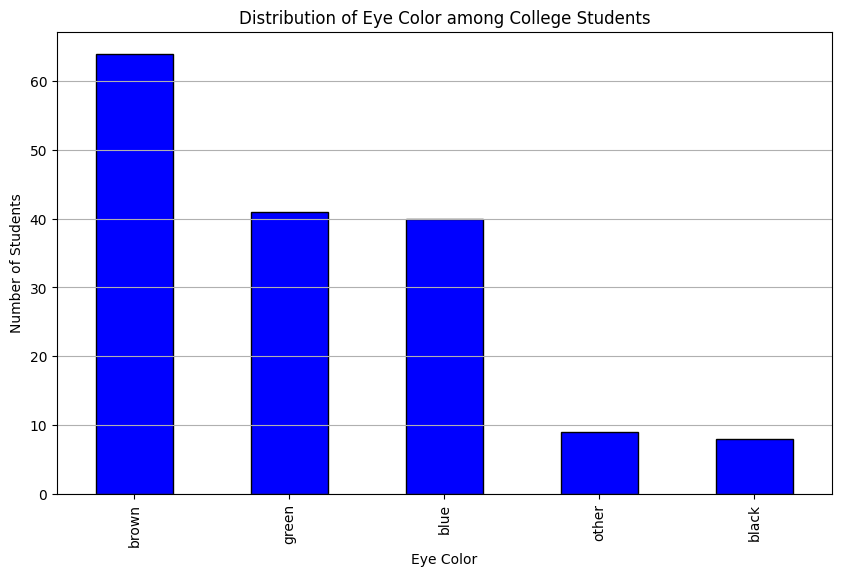

In [15]:
# Hair color distribution
hair_color_counts = survey_data['hair_color'].value_counts()
plt.figure(figsize=(10, 6))
hair_color_counts.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Distribution of Hair Color among College Students')
plt.xlabel('Hair Color')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()

# Eye color distribution
eye_color_counts = survey_data['eye_color'].value_counts()
plt.figure(figsize=(10, 6))
eye_color_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Eye Color among College Students')
plt.xlabel('Eye Color')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()

## Problem 3 - Using the Binomial Distribution

In [16]:
import scipy.stats as stats
import numpy as np

# Function to calculate ensemble accuracy
def ensemble_accuracy(n_models, model_accuracy):
    probabilities = [stats.binom.pmf(k, n_models, model_accuracy) for k in range(n_models + 1)]
    majority_prob = sum(probabilities[(n_models // 2 + 1):])
    return majority_prob

### Ensemble model accuracy with 15 models, each 63% accuracy

In [17]:
n_models = 15
model_accuracy = 0.63
ensemble_acc = ensemble_accuracy(n_models, model_accuracy)
print(f"Ensemble model accuracy with 15 models (each 63% accuracy): {ensemble_acc:.4f}")

Ensemble model accuracy with 15 models (each 63% accuracy): 0.8513


### Find the individual model accuracy for 95% ensemble accuracy

In [18]:

desired_ensemble_acc = 0.95
accuracies = np.arange(0.01, 1.0, 0.01)
for acc in accuracies:
    if ensemble_accuracy(n_models, acc) >= desired_ensemble_acc:
        print(f"Minimum individual model accuracy for 95% ensemble accuracy: {acc:.2f}")
        break


Minimum individual model accuracy for 95% ensemble accuracy: 0.71


### If each individual model has 63% accuracy, how many individual models are needed for the ensemble model to have 95% accuracy? <br> Find the smallest odd number of models (so there is a clear majority), so that this is satisfied.


In [19]:
# Question 3: Find the number of models needed for 95% ensemble accuracy with 63% individual model accuracy
model_accuracy = 0.63
n_models = 1  # Start with the smallest odd number
while True:
    if ensemble_accuracy(n_models, model_accuracy) >= desired_ensemble_acc:
        print(f"Minimum number of models needed for 95% ensemble accuracy: {n_models}")
        break
    n_models += 2  # Increment by 2 to keep it an odd number


Minimum number of models needed for 95% ensemble accuracy: 39


## Problem 4 - Working with Random Data

In [20]:
import numpy as np
import matplotlib.pyplot as plt

### Define the PMF

In [21]:
values = [1, 2, 3, 4, 5]
probabilities = [0.1, 0.2, 0.3, 0.25, 0.15]

### Function to generate 50 random X-values and return their mean

In [22]:
def generate_random_means(n=50):
    random_values = np.random.choice(values, size=n, p=probabilities)
    mean_value = np.mean(random_values)
    return mean_value

### Function to run the above function 1,000 times

In [23]:
def simulate_means(num_simulations=1000, n=50):
    means = [generate_random_means(n) for _ in range(num_simulations)]
    return means

### Create histogram of the means

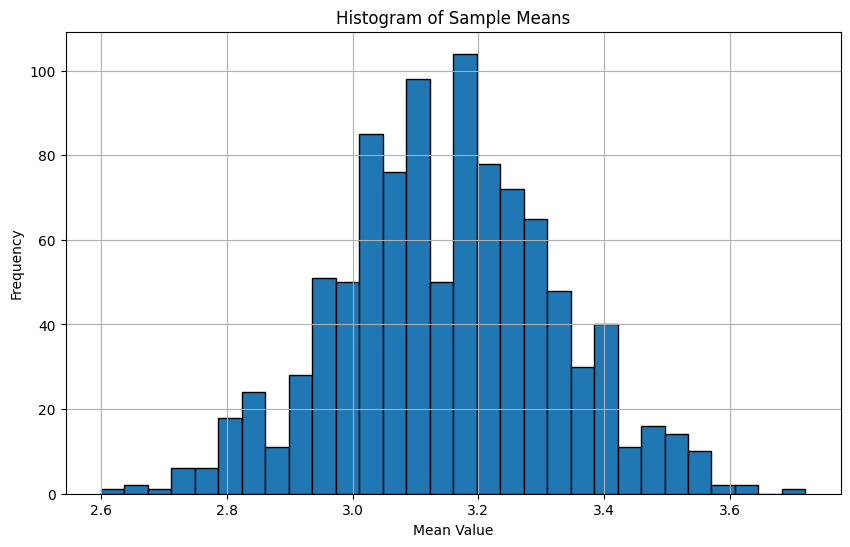

In [24]:
means = simulate_means()
plt.figure(figsize=(10, 6))
plt.hist(means, bins=30, edgecolor='black')
plt.title('Histogram of Sample Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Calculate the mean and standard deviation of the list of means. Theoretical Values?

In [25]:
mean_of_means = np.mean(means)
std_of_means = np.std(means)

# Theoretical mean and standard deviation
theoretical_mean = np.dot(values, probabilities)
theoretical_variance = np.dot((np.array(values) - theoretical_mean) ** 2, probabilities)
theoretical_std = np.sqrt(theoretical_variance / 50)  # For the mean of 50 samples

print(f"Mean of the list of means: {mean_of_means:.4f}")
print(f"Standard deviation of the list of means: {std_of_means:.4f}")
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Theoretical standard deviation: {theoretical_std:.4f}")


Mean of the list of means: 3.1492
Standard deviation of the list of means: 0.1726
Theoretical mean: 3.1500
Theoretical standard deviation: 0.1690
